
<font size = 5 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 4 >In this Exercise the main purpose is to learn the structure and features of the Boosting models & Neural Networks. Because the ANN are in every domain of Data Science the need for them knowledge is obligational. Therefore, in this Exercise you need to train different structures of NN's & XGBoost model with main goal of finding the top 3 models for the given Dataset.</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange'>
In this Dataset you have historical informations about the Bitcoin price in the next day and thirty days before.
<li>Target column (Y): Closе - closed price for the next day of the Bitcoin</li>
<li>X columns: Close_i {i e [1,30]}</li>
<li>Close_i: Closed price of the Bitcoin i days ago</li>

</font>


<font color = 'Orange' size = 4 > Train XGBoost model </font>

<font color = 'Orange' size = 4 > Train different NN's </font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures
<li>Choose the number of layers your model will have</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error, ....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

<ul>

<font color = 'Orange'>
Save the three best models in a table with the given columns
<li>Number of the model</li>
<li>Number of layers</li>
<li>Number of neurons in each layer</li>
<li>Activation function for each layer</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>R2 score for the prediction of the test part (this is the metric for rating the models)</li>

</ul>
</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/datasets/BTC_dataset.csv")

In [4]:
data

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,2020-12-10,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750,15701.339840,15290.902340
1428,2020-12-11,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750,15701.339840
1429,2020-12-12,18803.656250,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750
1430,2020-12-13,19142.382810,18803.656250,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590


#Conclusion by the data, because of the Y column, we need regression models 


Preprocessing of the data

In [5]:
data.isnull().sum() #No null values

Date        0
Close       0
Close_1     0
Close_2     0
Close_3     0
Close_4     0
Close_5     0
Close_6     0
Close_7     0
Close_8     0
Close_9     0
Close_10    0
Close_11    0
Close_12    0
Close_13    0
Close_14    0
Close_15    0
Close_16    0
Close_17    0
Close_18    0
Close_19    0
Close_20    0
Close_21    0
Close_22    0
Close_23    0
Close_24    0
Close_25    0
Close_26    0
Close_27    0
Close_28    0
Close_29    0
Close_30    0
dtype: int64

In [6]:
x = data.iloc[:,2:]
y = data.iloc[:,1:2]

In [7]:
x
y

,Close
0,823.984009
1,818.411987
2,821.797974
3,831.533997
4,907.937988
...,...
1427,18264.992190
1428,18058.904300
1429,18803.656250
1430,19142.382810


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train, Y_train)
X_train_scaler

array([[2.64645308e-01, 2.68894778e-01, 2.64776721e-01, ...,
        2.41030979e-01, 2.36176505e-01, 2.28746899e-01],
       [0.00000000e+00, 1.02447275e-03, 1.43659018e-03, ...,
        6.82331909e-04, 6.98301765e-04, 3.81949744e-04],
       [3.38842083e-01, 3.43130113e-01, 3.40888175e-01, ...,
        3.34950824e-01, 3.53641345e-01, 3.48234231e-01],
       ...,
       [4.37355401e-01, 4.55814655e-01, 4.48696301e-01, ...,
        3.80253128e-01, 3.79894683e-01, 3.30698758e-01],
       [2.60917065e-01, 2.60710908e-01, 2.68145790e-01, ...,
        1.68123553e-01, 1.75614613e-01, 1.49849162e-01],
       [3.34910063e-01, 3.25021676e-01, 3.23863323e-01, ...,
        3.17243405e-01, 3.15353549e-01, 3.18224369e-01]])

In [10]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler

array([[0.36483755, 0.38295938, 0.38203109, ..., 0.23679717, 0.25038456,
        0.25612693],
       [0.09483372, 0.09612409, 0.09477375, ..., 0.10832808, 0.10440385,
        0.11140399],
       [0.28752306, 0.30291377, 0.30514584, ..., 0.29620932, 0.29476913,
        0.28883846],
       ...,
       [0.01843889, 0.01813587, 0.02100602, ..., 0.007619  , 0.00757167,
        0.00768353],
       [0.58724281, 0.59711294, 0.59232624, ..., 0.5670312 , 0.58966024,
        0.56523006],
       [0.01124546, 0.0110721 , 0.01120889, ..., 0.00698881, 0.00664777,
        0.01258694]])

<h1> First model: XGBRegressor


In [11]:
from xgboost import XGBRegressor


In [12]:
model_1 = XGBRegressor(max_depth=10, learning_rate=0.08, n_estimators=120,objective ='reg:linear',silent=False)

In [13]:
model_1.fit(X_train, Y_train)

[16:57:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=10, n_estimators=120, silent=False)

In [14]:
y_pred = model_1.predict(X_test)

In [15]:
y_pred

array([ 7859.09   ,  2687.8452 ,  6197.5273 ,  6286.691  ,  9238.873  ,
        4055.9534 , 10060.076  ,  7565.168  ,  6764.0317 , 10433.703  ,
        3933.4246 , 14453.98   ,  6639.139  ,   979.2351 ,  4836.9165 ,
        8513.143  , 10727.879  ,  2737.144  ,  8840.247  , 13605.783  ,
        6478.42   ,  2764.2275 ,   962.9287 ,   827.62445,  8123.162  ,
        6327.7744 , 16224.462  ,  7571.2383 ,  5504.527  ,   928.1376 ,
        9240.629  ,  6538.0674 , 10600.203  ,  3797.7327 ,  7405.742  ,
        7984.2686 ,  1051.2705 ,  4029.07   ,  8274.554  ,  1235.9838 ,
       11826.23   ,  6577.3364 , 10319.049  ,  2319.4924 ,  7416.716  ,
        7870.0913 ,  6827.8726 ,  4020.0923 ,  4663.6616 , 11688.087  ,
        7912.703  ,  8159.8755 ,  7574.8794 ,  8164.2905 ,  6236.6025 ,
        1240.2913 ,  9311.595  ,  3992.466  ,  8636.661  ,  5965.2437 ,
        9141.458  , 13837.027  ,  1032.7618 ,   906.25665,  2740.1704 ,
        6614.325  ,  7351.3804 ,  5556.9326 ,  9244.515  ,  5402

<h1>Evalution of model 1 (without scaler)

In [16]:
from sklearn.metrics import mean_absolute_error
import numpy as np


In [17]:
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test)))) 

Mean Absolute Error : 15.625189592550168


<h1> Evalution of model 1 (with scaler)

In [18]:
model_1.fit(X_train_scaler, Y_train)

[16:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=10, n_estimators=120, silent=False)

In [19]:
y_pred_scaler = model_1.predict(X_test_scaler)

In [20]:
y_pred_scaler

array([ 7859.09   ,  2687.8452 ,  6197.5273 ,  6286.691  ,  9238.873  ,
        4055.9534 , 10060.076  ,  7565.168  ,  6764.0317 , 10433.703  ,
        3933.4246 , 14453.98   ,  6639.139  ,   979.2351 ,  4836.9165 ,
        8513.143  , 10727.879  ,  2737.144  ,  8840.247  , 13605.783  ,
        6478.42   ,  2764.2275 ,   962.9287 ,   827.62445,  8123.162  ,
        6327.7744 , 16224.462  ,  7571.2383 ,  5504.527  ,   928.1376 ,
        9240.629  ,  6538.0674 , 10600.203  ,  3797.7327 ,  7405.742  ,
        7984.2686 ,  1051.2705 ,  4029.07   ,  8274.554  ,  1235.9838 ,
       11826.23   ,  6577.3364 , 10319.049  ,  2319.4924 ,  7416.716  ,
        7870.0913 ,  6827.8726 ,  4020.0923 ,  4663.6616 , 11688.087  ,
        7912.703  ,  8159.8755 ,  7574.8794 ,  8164.2905 ,  6236.6025 ,
        1240.2913 ,  9311.595  ,  3992.466  ,  8636.661  ,  5965.2437 ,
        9141.458  , 13837.027  ,  1032.7618 ,   906.25665,  2740.1704 ,
        6614.325  ,  7351.3804 ,  5556.9326 ,  9244.515  ,  5402

In [21]:
print("Mean Absolute Error of model 1 with scaler: " + str(np.sqrt(mean_absolute_error(y_pred_scaler, Y_test)))) 

Mean Absolute Error of model 1 with scaler: 15.625189592550168


We can see the results are quite similar with and without scaler

----

<h1> Second model: LGBM


In [22]:
#making new dataset to avoid problems because of changes in dataset
data_2 = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/datasets/BTC_dataset.csv")

In [23]:
data_2.head()

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029


In [24]:
x2 = data_2.iloc[:,2:]
y2 = data_2.iloc[:,1:2]

In [25]:
x2
y2

,Close
0,823.984009
1,818.411987
2,821.797974
3,831.533997
4,907.937988
...,...
1427,18264.992190
1428,18058.904300
1429,18803.656250
1430,19142.382810


In [26]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size=0.25) 

In [29]:
from catboost import CatBoostRegressor
#Trying with different parameters
#cb_model = CatBoostRegressor(iterations=500,
                            #  learning_rate=0.05,
                            #  depth=10,
                            #  eval_metric='RMSE',
                            #  random_seed = 42,
                            #  bagging_temperature = 0.2,
                            #  od_type='Iter',
                            #  metric_period = 50,
                            #  od_wait=20)
cb_model = CatBoostRegressor(iterations=100,
                             learning_rate=0.09,
                             depth=7,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cb_model.fit(X_train2, Y_train2)

0:	learn: 3563.4199078	total: 71.2ms	remaining: 7.05s
50:	learn: 454.3057001	total: 711ms	remaining: 683ms
99:	learn: 330.0826159	total: 1.34s	remaining: 0us


In [28]:
#!pip install catboost 

     |████████████████████████████████| 76.3 MB 52 kB/s 


In [30]:
y_pred2 = cb_model.predict(X_test2) 

In [31]:
print("Mean Absolute Error of model 2: " + str(np.sqrt(mean_absolute_error(y_pred2, Y_test2)))) 

Mean Absolute Error of model 2: 17.046427102694132


The first cb_model (the commented one) gave better results.
The second model (LSTM) is worse than the first model (XGBoost)

---

<h1>  Third model: Neural network only with Dense layers



In [32]:
data_3 = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/datasets/BTC_dataset.csv")

In [33]:
x3 = data_3.iloc[:,2:]
y3 = data_3.iloc[:,1:2]


In [34]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x3, y3, test_size=0.25) 

In [35]:
scaler = MinMaxScaler()
X_train3_scaler = scaler.fit_transform(X_train3, Y_train3)
X_train3_scaler

array([[0.38435446, 0.39935551, 0.38696266, ..., 0.26698702, 0.27920606,
        0.26565906],
       [0.64881761, 0.58832104, 0.54293838, ..., 0.40264894, 0.42921699,
        0.42427116],
       [0.28523434, 0.28765094, 0.28151054, ..., 0.33940337, 0.35889819,
        0.35140215],
       ...,
       [0.4922989 , 0.49370384, 0.49893067, ..., 0.51227344, 0.50976084,
        0.50119566],
       [0.29174302, 0.28883846, 0.3072182 , ..., 0.29791504, 0.29942547,
        0.29168786],
       [0.28867835, 0.29119428, 0.29801196, ..., 0.30809647, 0.30925282,
        0.31504837]])

In [36]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
model3 = Sequential()

In [38]:
model3.add(Dense(32, input_dim=30,activation='tanh'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='tanh'))
model3.add(Dense(1, activation='linear'))

In [39]:
model3.compile(loss='mean_squared_error', optimizer='adam') 

In [40]:
history_model3 = model3.fit(X_train3_scaler, Y_train3, epochs=50, batch_size=20,  verbose=1, validation_split=0.2)
 

Epoch 1/50
43/43 [==============================] - 2s 14ms/step - loss: 69198440.0000 - val_loss: 66294768.0000
Epoch 2/50
43/43 [==============================] - 0s 5ms/step - loss: 69174536.0000 - val_loss: 66276192.0000
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 69157080.0000 - val_loss: 66261920.0000
Epoch 4/50
43/43 [==============================] - 0s 6ms/step - loss: 69147232.0000 - val_loss: 66254704.0000
Epoch 5/50
43/43 [==============================] - 0s 4ms/step - loss: 69140296.0000 - val_loss: 66248024.0000
Epoch 6/50
43/43 [==============================] - 0s 6ms/step - loss: 69133728.0000 - val_loss: 66241732.0000
Epoch 7/50
43/43 [==============================] - 0s 5ms/step - loss: 69127408.0000 - val_loss: 66235532.0000
Epoch 8/50
43/43 [==============================] - 0s 6ms/step - loss: 69121208.0000 - val_loss: 66229488.0000
Epoch 9/50
43/43 [==============================] - 0s 5ms/step - loss: 69115088.0000 - val_loss: 66223

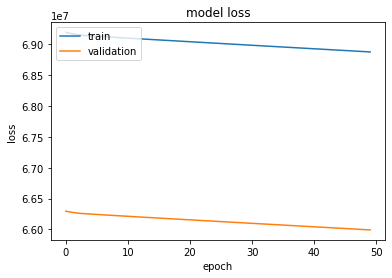

In [41]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history_model3.history['loss'])
plt.plot(history_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
X_test3_scaler = scaler.transform(X_test3)

In [43]:
y_pred3 = model3.predict(X_test3_scaler) 

In [44]:
print("Mean Absolute Error of model 3: " + str(np.sqrt(mean_absolute_error(y_pred3, Y_test3)))) 

Mean Absolute Error of model 3: 85.98756940634743


Mean Absolute Error of model 3: 86.39524131005125. <br>
That's some big error.


<h1> Model 4 NN with Drop layers

In [45]:
model4 = Sequential()

In [46]:
model4.add(Dense(32, input_dim=30,activation='relu'))
model4.add(Dropout(0.2, input_shape=(32,)))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2, input_shape=(16,)))
model4.add(Dense(8, activation='relu'))
model4.add(Dropout(0.2, input_shape=(8,)))
model4.add(Dense(1, activation='linear'))

In [47]:
model4.compile(loss='mean_squared_error', optimizer='adam') 

In [48]:
history_model4 = model4.fit(X_train3_scaler, Y_train3, epochs=50, batch_size=20,  verbose=1, validation_split=0.2)


Epoch 1/50
43/43 [==============================] - 1s 5ms/step - loss: 69212008.0000 - val_loss: 66310460.0000
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 69172936.0000 - val_loss: 66242788.0000
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 69040776.0000 - val_loss: 66019012.0000
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 68652392.0000 - val_loss: 65400452.0000
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 67643104.0000 - val_loss: 63985460.0000
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 65690280.0000 - val_loss: 61225220.0000
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 62031884.0000 - val_loss: 56436196.0000
Epoch 8/50
43/43 [==============================] - 0s 3ms/step - loss: 56032620.0000 - val_loss: 49035984.0000
Epoch 9/50
43/43 [==============================] - 0s 2ms/step - loss: 48308372.0000 - val_loss: 394046

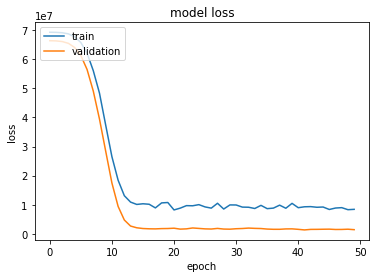

In [49]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history_model4.history['loss'])
plt.plot(history_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
y_pred4 = model4.predict(X_test3_scaler) 

In [51]:
print("Mean Absolute Error of model 4: " + str(np.sqrt(mean_absolute_error(y_pred4, Y_test3)))) 

Mean Absolute Error of model 4: 30.84320200093673


<h2>Dropout Layers did not change the result, but <b>changing the activation function</b> from tanh to relu improved the model a lot !!! Still, XGB is much better than these two NN.

<h1> Model 5 CNN


In [52]:
import keras.backend as K
from keras.layers import Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
data_5 = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/datasets/BTC_dataset.csv")
x5 = data_5.iloc[:,2:]
y5 = data_5.iloc[:,1:2]
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(x5, y5, test_size=0.25) 

In [54]:
scaler = MinMaxScaler()
X_train5_scaler = scaler.fit_transform(X_train5, Y_train5)
X_train5_scaler

array([[0.26278972, 0.25368449, 0.27337337, ..., 0.18146569, 0.18285139,
        0.16638101],
       [0.01418394, 0.01328407, 0.01391192, ..., 0.02550225, 0.0265621 ,
        0.02528109],
       [0.45405103, 0.46642107, 0.45303677, ..., 0.35432832, 0.35081476,
        0.33161493],
       ...,
       [0.01461909, 0.01442939, 0.01467858, ..., 0.00613954, 0.00765266,
        0.00784822],
       [0.46300997, 0.46876445, 0.4615813 , ..., 0.53547605, 0.52380153,
        0.53630286],
       [0.47403115, 0.47506152, 0.45624048, ..., 0.325998  , 0.32608535,
        0.34251015]])

In [55]:
X_test5_scaler = scaler.fit(X_test5)

In [56]:
entry_dimension = len(X_train)
print(entry_dimension)

1074


In [66]:
print(X_train5_scaler.shape)

(1074, 30)


In [74]:
K.clear_session()
model5 = Sequential()
#model5.add(Embedding(30, 150, input_length=X_train5_scaler.shape[1])) --> Embedding ne koristime za vremenski serii, samo za tekstualni podatoci
model5.add(Conv1D(input_shape=(30,1),filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))    
model5.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(1, activation='softmax'))

In [68]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 

In [69]:
model_history5 = model5.fit(X_train5_scaler, Y_train5,  epochs=10, batch_size=128, verbose=2, validation_split=0.2)
 

Epoch 1/10
7/7 - 4s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 4s/epoch - 521ms/step
Epoch 2/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 223ms/epoch - 32ms/step
Epoch 3/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 240ms/epoch - 34ms/step
Epoch 4/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 223ms/epoch - 32ms/step
Epoch 5/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 219ms/epoch - 31ms/step
Epoch 6/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 223ms/epoch - 32ms/step
Epoch 7/10
7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 224ms/epoch - 32ms/step
Epoch 8/10
7/7 - 0s - loss: 0.0000e+

In [70]:
model5.save('model_cnn_lstm') 


INFO:tensorflow:Assets written to: model_cnn_lstm/assets


INFO:tensorflow:Assets written to: model_cnn_lstm/assets


In [71]:
import tensorflow as tf
model5 = tf.keras.models.load_model('model_cnn_lstm')

In [72]:
y_pred5 = model5.predict(X_test5)


In [73]:
y_pred5

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],